In [9]:
from growing_nn.graph.directed_graph import DirectedGraph
from growing_nn.graph.graph_nca import GraphNCA
from growing_nn.graph.generated_network import GeneratedNetwork
from ezrl.optimizer import RLOptimizer
from ezrl.policy import GymPolicy
from ezrl.algorithms.reinforce import ReinforceOptimizer

In [2]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 16

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [3]:
NUM_CHANNELS

23

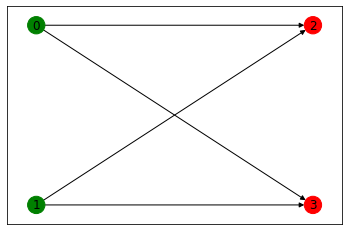

In [4]:
import torch
import numpy as np

x = torch.randn((4, NUM_CHANNELS))
x[0,1] = 1.0
x[0,1] = 1.0

edge_dict = {0:[2,3], 1:[2,3], 2:[], 3:[]}
# x = torch.randn((6, NUM_CHANNELS))
# edge_dict = {0:[2, 4], 1:[2, 3, 4], 4:[5], 5:[2, 3], 2:[], 3:[]}

graph = DirectedGraph(x, edge_dict, 2, 2)
image = graph.plot()

In [5]:
# Image.fromarray(image).save("minimal_net.png")

In [6]:
print("INPUT NODES", graph.input_nodes)
print("OUTPUT NODES", graph.output_nodes)

INPUT NODES [0, 1]
OUTPUT NODES [2, 3]


In [7]:
import torch.distributions as td

def loss_fn(logits, actions, rewards):
    categorical = td.categorical.Categorical(logits=logits)
    log_probs = -categorical.log_prob(actions)
    return torch.sum(rewards*log_probs)

In [8]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)
optimizer = torch.optim.Adam(nca.parameters(), lr=0.001)

In [9]:
list(nca.parameters())

[Parameter containing:
 tensor([[ 0.0945, -0.1361,  0.2236,  ..., -0.2211,  0.1920, -0.1731],
         [ 0.1079, -0.1387, -0.2059,  ..., -0.0471,  0.1198,  0.0864],
         [-0.0886, -0.0879,  0.1006,  ..., -0.1752, -0.0504,  0.1243],
         ...,
         [ 0.2413,  0.0557,  0.1024,  ..., -0.0800, -0.0949,  0.0910],
         [-0.1322, -0.0800, -0.0688,  ...,  0.1815,  0.1404,  0.1607],
         [ 0.1601,  0.2051,  0.0688,  ..., -0.1065,  0.1363, -0.2326]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0109,  0.0035, -0.0668,  ...,  0.0353,  0.0148, -0.1191],
         [-0.0037,  0.0560,  0.0373,  ...,  0.0902,  0.1104, -0.0846],
         [-0.0562, -0.1083,  0.0203,  ...,  0.0782, -0.0679, -0.1094],
         ...,
         [-0.0657, -0.0028,  0.0610,  ..., -0.0333, -0.1153, -0.1060],
         [ 0.0425,  0.0976,  0.0802,  ..., -0.0696, -0.0523,  0.0324],
         [-0.0768, -0.0682, -0.1083,  ..., -0.0625, -0.0814,  0.0657]],
        requires_grad=True),
 Parameter con

In [10]:
actions = torch.ones((32, 1)).long()
optimizer.zero_grad()
graph = nca.grow(5)
generated_network = graph.generate_network()
outputs, nodes = generated_network.batch_forward(torch.randn(32, 2))
loss = loss_fn(outputs, actions, torch.ones((32,1))*2)
loss.backward()
optimizer.step()

In [11]:
list(nca.parameters())

[Parameter containing:
 tensor([[ 0.0935, -0.1351,  0.2246,  ..., -0.2221,  0.1910, -0.1721],
         [ 0.1089, -0.1397, -0.2069,  ..., -0.0461,  0.1208,  0.0854],
         [-0.0876, -0.0889,  0.1016,  ..., -0.1762, -0.0514,  0.1253],
         ...,
         [ 0.2403,  0.0547,  0.1034,  ..., -0.0790, -0.0939,  0.0920],
         [-0.1312, -0.0810, -0.0698,  ...,  0.1825,  0.1394,  0.1597],
         [ 0.1611,  0.2041,  0.0678,  ..., -0.1055,  0.1373, -0.2336]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0099,  0.0025, -0.0658,  ...,  0.0343,  0.0158, -0.1181],
         [-0.0037,  0.0560,  0.0373,  ...,  0.0902,  0.1104, -0.0846],
         [-0.0572, -0.1093,  0.0213,  ...,  0.0772, -0.0669, -0.1084],
         ...,
         [-0.0647, -0.0018,  0.0600,  ..., -0.0343, -0.1143, -0.1070],
         [ 0.0415,  0.0966,  0.0812,  ..., -0.0706, -0.0533,  0.0314],
         [-0.0768, -0.0682, -0.1083,  ..., -0.0625, -0.0814,  0.0657]],
        requires_grad=True),
 Parameter con

In [12]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML

fig = plt.figure()
camera = Camera(fig)

images = []
img = graph.plot(fig=fig)
fig.clear()
images.append(img)
for i in range(5):
    graph = nca.grow(1)
    img = graph.plot(fig=fig)
    # camera.snap()
    fig.clear()
    images.append(img)

# animation = camera.animate()

<Figure size 432x288 with 0 Axes>

In [13]:
graph.nodes.size()

torch.Size([414, 23])

In [14]:
generated_network = graph.generate_network()

In [15]:
outputs, nodes = generated_network.batch_forward(torch.randn(32, 2))

In [41]:
nodes.size()

NameError: name 'nodes' is not defined

In [1]:
# from functorch import vmap

# def batch_forward(inp):
#     return generated_network(inp)

# examples = torch.randn(32, 2)

# result = vmap(batch_forward, randomness='different')(examples)

In [17]:
from PIL import Image

In [18]:
imgs = [Image.fromarray(img) for img in images]


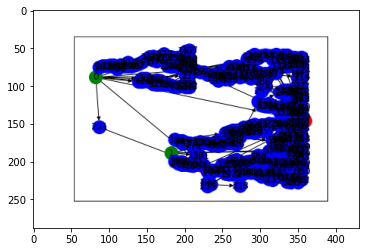

In [19]:
plt.imshow(images[-1])

In [97]:
Image.fromarray(images[1]).save("next_step.png")

In [96]:
imgs[0].save("array2.gif", save_all=True, append_images=imgs[1:], duration=1000, loop=0)

In [18]:
HTML(animation.to_html5_video())


In [10]:
generated_network = GeneratedNetwork(graph)

In [11]:
generated_network(torch.ones(2))[graph.output_nodes]

tensor([[-14.3090],
        [ 67.7032]], grad_fn=<IndexBackward0>)

#### RL

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from typing import Any, Dict, Optional, Callable
import torch.distributions as td
import numpy as np
import gym

In [5]:
from ezrl.optimizer import RLOptimizer
from ezrl.policy import GymPolicy
from ezrl.algorithms.reinforce import ReinforceOptimizer

In [11]:
from growing_nn.graph.directed_graph import DirectedGraph
from growing_nn.graph.graph_nca import GraphNCA
from growing_nn.graph.generated_network import GeneratedNetwork
from ezrl.optimizer import RLOptimizer
from ezrl.policy import GymPolicy
from ezrl.algorithms.reinforce import ReinforceOptimizer

In [6]:
env = gym.make("LunarLander-v2")

/home/shyam/anaconda3/envs/pytorch_geometric/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/shyam/anaconda3/envs/pytorch_geometric/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [24]:
class LunarLanderNCAPolicy(GymPolicy):
    def __init__(self, nca, num_growth_steps: int = 3):
        super().__init__()
        self.input_dims = 8
        self.output_dims = 4
        self.num_growth_steps = num_growth_steps

        self.nca = nca

    def generate_network(self, num_steps):
        graph = self.nca.grow(self.nca.graph, num_steps)
        generated_network = graph.generate_network()
        return generated_network

    def forward(self, obs: Any, generated_network = None) -> Dict[str, Any]:
        if generated_network is not None:
            generated_network = self.generate_network(self.num_growth_steps)
        logits = generated_network.batch_forward(inputs=obs)
        dist = td.Categorical(logits=logits)
        action = dist.sample()
        return {"action":action, "dist":dist}

    def act(self, obs: Any, generated_network = None):
        out = self.forward(obs, generated_network)
        return out["action"].item(), out

In [25]:
def reinforce_rollout(
    policy: GymPolicy, env_name: str = None, env=None, env_creation_fn=None
):
    if env_name is None and env is None:
        raise ValueError("env_name or env must be provided!")
    if env is None:
        if env_creation_fn is None:
            env_creation_fn = gym.make
        env = env_creation_fn(env_name)
    done = False
    observations, actions, rewards = (
        [],
        [],
        [],
    )
    observation = env.reset()
    with torch.no_grad():
        generated_network = policy.generate_network(policy.num_growth_steps)
        while not done:
            action, out = policy.act(
                torch.from_numpy(observation).unsqueeze(0).to(policy.device), generated_network
            )
            next_observation, reward, done, info = env.step(action)

            observations.append(observation)
            actions.append(action)
            rewards.append(reward)

            observation = next_observation

    return np.array(observations), np.array(actions), np.array(rewards)


In [26]:
from torch.utils.tensorboard import SummaryWriter
import os
from datetime import datetime

def get_tensorboard_logger(experiment_name: str, base_log_path: str = "tensorboard_logs"):
    log_path = "{}/{}_{}".format(
            base_log_path, experiment_name, datetime.now()
        )
    train_writer = SummaryWriter(log_path, flush_secs=10)
    full_log_path = os.path.join(os.getcwd(), log_path)
    print(
        "Follow tensorboard logs with: tensorboard --logdir '{}'".format(
            full_log_path
        )
    )
    return train_writer

In [27]:
NUM_OPERATIONS = 3
NUM_ACTIVATIONS = 2
NUM_HIDDEN_CHANNELS = 24

NUM_CHANNELS = GraphNCA.get_number_of_channels(NUM_OPERATIONS, NUM_ACTIVATIONS, NUM_HIDDEN_CHANNELS)

In [34]:
def make_inital_graph(num_inputs, num_outputs, device):
    x = torch.ones((num_inputs + num_outputs, NUM_CHANNELS), device=device)
    edge_dict = {}
    for i in range(num_inputs):
        edge_dict[i] = list(range(num_inputs, num_inputs+num_outputs))
    for i in range(num_inputs, num_inputs+num_outputs):
        edge_dict[i] = []
    return DirectedGraph(x, edge_dict, num_inputs, num_outputs)

In [35]:
device = torch.device('cuda')

graph = make_inital_graph(8, 4, device)

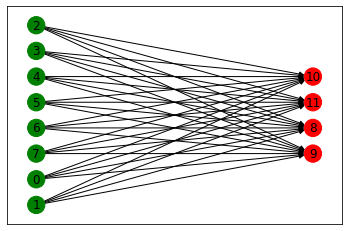

In [36]:
image = graph.plot()

In [40]:
graph.nodes

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],

In [37]:
nca = GraphNCA(graph, NUM_HIDDEN_CHANNELS)

In [38]:
from tqdm import tqdm


policy = LunarLanderNCAPolicy(nca,num_growth_steps=16)
policy = policy.to(device)

In [39]:
bar = tqdm(np.arange(50000))

writer = get_tensorboard_logger("ReinforceLunarLander")
optimizer = ReinforceOptimizer(policy, lr=0.001)

for i in bar:
    observations, actions, rewards = optimizer.rollout(reinforce_rollout, env_name = "LunarLander-v2")

    torch_observations = torch.from_numpy(observations).to(policy.device)
    torch_actions = torch.from_numpy(actions).float().to(policy.device)
    torch_rewards = torch.from_numpy(rewards).float().to(policy.device)


    optimizer.zero_grad()
    loss = optimizer.loss_fn(torch_observations, torch_actions, torch_rewards)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(policy.parameters(), 10.0)
    optimizer.step()

    # metrics

    grad_dict = {}
    for n, W in policy.named_parameters():
        if W.grad is not None:
            grad_dict["{}_grad".format(n)] = float(torch.sum(W.grad).item())

    loss = loss.item()
    sum_reward = np.sum(rewards)

    metrics_dict = {"loss":loss, "sum_reward":sum_reward, **grad_dict}

    for key in metrics_dict:
        writer.add_scalar(key, metrics_dict[key], i)


    bar.set_description("Loss: {}, Reward: {}".format(loss, sum_reward))

  0%|                                                                         | 0/50000 [00:00<?, ?it/s]

Follow tensorboard logs with: tensorboard --logdir '/home/shyam/Code/growing-nn/notebooks/tensorboard_logs/ReinforceLunarLander_2022-08-14 16:52:22.039353'


  0%|                                                                         | 0/50000 [00:01<?, ?it/s]


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper__index_select)